# Reserch for online store

Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue.<br>
We need to do the following steps:
- We need to prioritize these hypotheses
- launch an A/B test
- and analyze the results
<br><br>
We got the following files:<br>
- hypotheses_us.csv - list of hypotheses  <br>
- orders_us.csv - list of orders  <br>
- visits_us.csv - list of visits  <br>


##  Download the data and prepare it for analysis

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

In [2]:
try:
    file_name = 'hypotheses_us.csv'
    hypotheses = pd.read_csv('https://code.s3.yandex.net/datasets/' + file_name,sep=';')
except:
  print("An exception occurred will reading csv file", file_name)

try:
    file_name = 'orders_us.csv'
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/' + file_name,         
         parse_dates=['date'],
     )
except:
  print("An exception occurred will reading csv file", file_name)

try:
    file_name = 'visits_us.csv'
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/' + file_name,
         parse_dates=['date'],
     )
except:
  print("An exception occurred will reading csv file", file_name)

In [3]:
#Explorer data
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


All data types are correct

In [5]:
#Check for duplicates
hypotheses.duplicated().sum()

0

There are no duplicated rows in hypotheses table

In [6]:
#Explorer data
hypotheses.describe(include = ['object'])

,Hypothesis
count,9
unique,9
top,Add two new channels for attracting traffic. This will bring 30% more users
freq,1


In [7]:
#Explorer data
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


All data types are correct

In [9]:
#Check for duplicates
orders.duplicated().sum()

0

In [10]:
#Explorer data
orders.describe(include = ['object'])

,group
count,1197
unique,2
top,B
freq,640


There are no duplicated rows in orders table

In [11]:
filtered_orders = orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()
filtered_orders['group'].value_counts() 

1    973
2     58
Name: group, dtype: int64

There are 58 users that Associated to both groups.
We shall remove them 

In [12]:
#drop users that Associated to both groups
orders.drop(orders[orders['visitorId'].isin(filtered_orders[filtered_orders['group']==2]['visitorId'])].index,inplace=True)

In [13]:
orders['group'].value_counts() 

B    548
A    468
Name: group, dtype: int64

<b>we got groups with different sizes <br>
   we are given a ready-made A/B dataset<br>
   There is no other option  than work with this dataset
</b>

In [14]:
#Explorer data
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
#Explorer data
visits.describe(include = ['object'])

,group
count,62
unique,2
top,B
freq,31


In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


All data types are correct

In [17]:
#Check for duplicates
visits.duplicated().sum()

0

There are no duplicated rows in visits table

### Conclusion

- All data types are in the correct form.
- There are no duplicates in data.
- There are 58 users that Associated to both groups.We removed them 
- we got groups with different sizes <br>
  we are given a ready-made A/B dataset<br>
  There is no other option  than work with this dataset

## Prioritizing Hypotheses

###  Apply the ICE framework to prioritize hypotheses

In [18]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [19]:
#Calculate ICE
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
hypotheses.sort_values(by='ICE', ascending=False,inplace=True)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


### Apply the RICE framework to prioritize hypotheses

In [20]:
#Calculate RICE
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
hypotheses.sort_values(by='RICE', ascending=False,inplace=True)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


###  Show how the prioritization of hypotheses changes when you use RICE instead of ICE

In [21]:
#Calc ICE_index
hypotheses  =  hypotheses.sort_values(by='ICE',ascending=False)
hypotheses['ICE_index']  =  hypotheses.reset_index().index
#Calc RICE_index
hypotheses  =  hypotheses.sort_values(by='RICE',ascending=False)
hypotheses['RICE_index'] = hypotheses.reset_index().index

hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE,ICE_index,RICE_index
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0,2,0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0,4,1
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0,1,2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0,3,3
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2,0,4
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0,7,5
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0,5,6
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0,6,7
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0,8,8


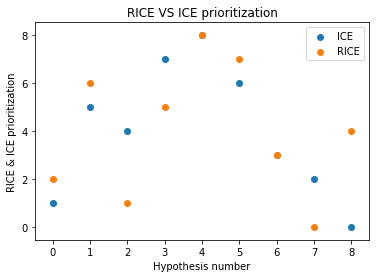

In [22]:
plt.scatter(hypotheses.index, hypotheses['ICE_index'], label='ICE') 
plt.scatter(hypotheses.index, hypotheses['RICE_index'], label='RICE') 
plt.title("RICE VS ICE prioritization")
plt.xlabel("Hypothesis number")
plt.ylabel("RICE & ICE prioritization")
plt.legend();

- We can see that the 'Reach' parameter changed the prioritization of the hypotheses.
- hypotheses with low ICE got high value of 'Reach'(hypothese no.2) and got high prioritization.
- hypotheses with high ICE got low value of 'Reach'(hypothese no.8) and got low prioritization.
- hypotheses 4,6 remaind with the same prioritization

## Part 2. A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



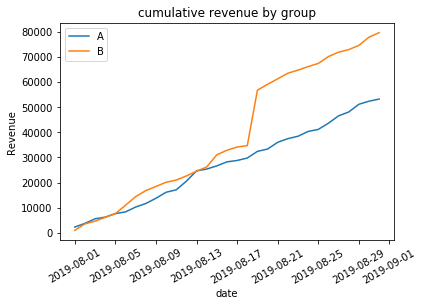

In [23]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visits  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("cumulative revenue by group")
plt.xlabel("date")
plt.ylabel("revenue")
plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.legend();

- Revenue is rising steadily.
- Both groups have spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders.

### Graph cumulative average order size by group. Make conclusions and conjectures

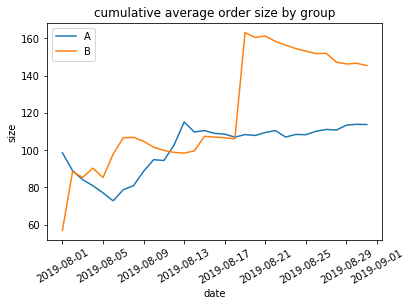

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("cumulative average order size by group")
plt.xlabel("date")
plt.ylabel("size")
plt.xticks(rotation=30)
plt.legend();

- Average purchase size becomes steady by the end of the test.
- The surge in group B in the 2 peeks of the test may have been due to the presence of large, expensive orders.

###  Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.


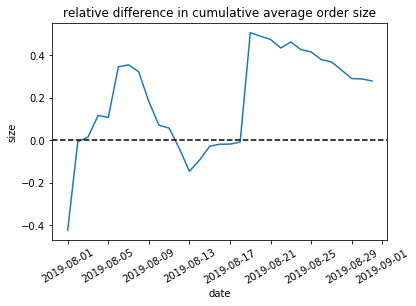

In [25]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge\
                            (cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1) 
plt.title("relative difference in cumulative average order size")
plt.xlabel("date")
plt.ylabel("size")
plt.xticks(rotation=30)
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--');

- At several points the difference between the segments increaces.
  This means there must be some big orders and outliers
- group B  results are better and looks like it got stabilized

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


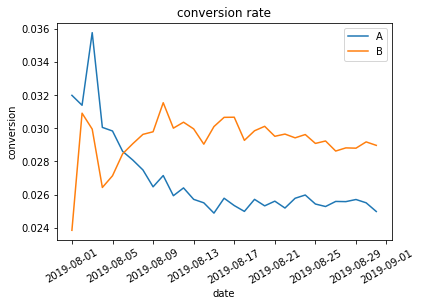

In [26]:
 #calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("conversion rate")
plt.xlabel("date")
plt.ylabel("conversion")
plt.xticks(rotation=30)
plt.legend();

- conversion rate of group A dropping and didnt yet stabilized.
- conversion rate of group B rised and then dropped and then rised again didnt yet stabilized.

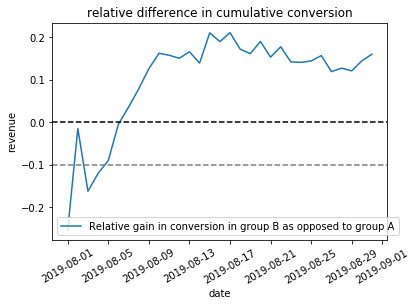

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date', right_on='date',
                                                                           how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
         /mergedCumulativeConversions['conversionA']-1,
         label="Relative gain in conversion in group B as opposed to group A")
plt.legend()
plt.title("relative difference in cumulative conversion")
plt.xlabel("date")
plt.ylabel("revenue")
plt.xticks(rotation=30)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');


- The difference in conversion between the groups tells us that group B's results are better  and continues to be improving 

#### Conclusion

- conversion rate of both group  didnt yet stabilized
- The relative difference between the groups tells us that group B's results are better and continues to be improving,     but didnt yet stabilized.
- It is to early to draw conclusions about the test. we need to continue the test and also analyze anomalies.

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [28]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
920,3057892078,249864742,2019-08-21,90.1,B
120,1599526656,2273809679,2019-08-22,70.9,B
281,2330926120,1935367901,2019-08-18,20.4,A
417,2470267229,2274825520,2019-08-06,10.8,A
830,217480737,2846507753,2019-08-30,20.2,B


In [29]:
# number of orders per user
orders_per_user = orders.groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
orders_per_user.columns = ['visitorId', 'num_of_orders']
orders_per_user.sample(5)

,visitorId,num_of_orders
967,4258103007,1
68,290022471,1
531,2308309101,1
39,187589092,1
401,1738775963,1


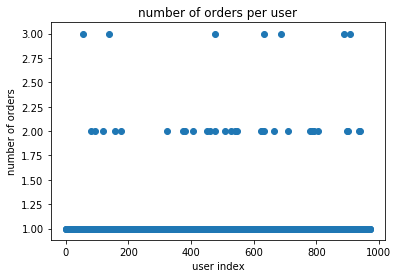

In [30]:
plt.scatter(orders_per_user.index, orders_per_user['num_of_orders'])
plt.title("number of orders per user")
plt.xlabel("user index")
plt.ylabel("number of orders");

In [31]:
orders_per_user['num_of_orders'].value_counts()

1    937
2     29
3      7
Name: num_of_orders, dtype: int64

 - There are 29 users that made 2 orders
 - There ared 7 users that made 3 orders

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.


In [32]:
np.percentile(orders_per_user['num_of_orders'], [95, 99])

array([1., 2.])

- No more than 5% of users placed more than 1 orders
- No more than 1% of users placed more than 2 orders
- 2 orders is the point at which a data points becaomes an anomaly

### Plot a scatter chart of order prices. Make conclusions and conjectures.

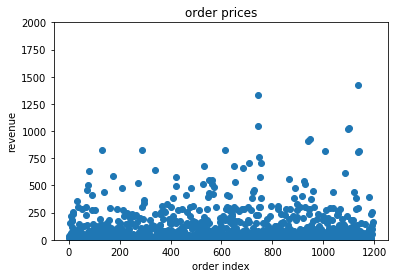

In [33]:
plt.scatter(orders.index, orders['revenue']) 
# there are 2 large outliers, because of then we cant see alll outliers 
# in order to see all the outliers on the graph, we limit the graph on the y-axis
plt.ylim(0, 2000)
plt.title("order prices")
plt.xlabel("order index")
plt.ylabel("revenue");

In [34]:
 orders['revenue'].sort_values(ascending=False)

425     19920.4
1196     3120.1
1136     1425.8
744      1335.6
743      1050.0
         ...   
307         5.2
908         5.2
602         5.1
404         5.1
1003        5.0
Name: revenue, Length: 1016, dtype: float64

 - There is 1 huge order with 19920.4 revenue.
 - There is also 1 large order with 3129.1 revenue.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [35]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

- No more than 5% of orders as revenue greater than 414.275 
- No more than 1% of orders as revenue greater than 830.3
- 414.275 is the point at which a data points becaomes an anomaly

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


1. null hypothesis H₀ -"The statistically significant in conversion between the groups is the same"               
2. alternative hypothesis H₁ - "The statistically significant in conversion between the groups is differ."
3. critical level of statistical significance that we will use is 0.05

In [36]:
# orders from group A
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
#orders from group B
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                                                                           - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                                                                           - len(ordersByUsersB['orders'])), name='orders')],axis=0) 


In [37]:
# Mann-Whitney test
mannwhitney_Sample = "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,True,'two-sided')[1])
mannwhitney_Sample

'0.011'

In [38]:
#Reviewer's code
import scipy
scipy.__version__

'1.4.1'

In [39]:
#relative difference in mean
mannwhitney_mean = "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)
mannwhitney_mean

'0.160'

- The p-value is 0.011, which is lower than 0.05. So we reject the null hypothesis that there's not a statistically significant       difference in conversion between the groups.
- The relative difference in mean for group B is  bigger than it is for group A.
- There is a difference between groups A and B.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


1. null hypothesis H₀ -"The statistically significant in average order size between the groups is the same"               
2. alternative hypothesis H₁ - "The statistically significant in average order size between the groups is differ."
3. critical level of statistical significance that we will use is 0.05

In [40]:
mannwhitney_revenue = '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                          orders[orders['group']=='B']['revenue'],True,'two-sided')[1])
mannwhitney_revenue

'0.862'

In [41]:
mannwhitney_revenue_mean = '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()\
                                            /orders[orders['group']=='A']['revenue'].mean()-1)
mannwhitney_revenue_mean

'0.278'

- The p-value is  higher than 0.05, so we can't reject the null hypothesis and conclude that average order size differs between    the groups.
- Average order size for group B is bigger than it is for group A.


### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


1. null hypothesis H₀ -"The statistically significant in conversion between the groups is the same"               
2. alternative hypothesis H₁ - "The statistically significant in conversion between the groups is differ."
3. critical level of statistical significance that we will use is 0.05

In [42]:
#declare outliers
orders_outliers = np.percentile(orders_per_user['num_of_orders'], [95, 99][0])
revenue_outliers= np.percentile(orders['revenue'], [95, 99][0])

# remove users that made more than 1 order
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_outliers]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > orders_outliers]['visitorId']], axis = 0)

# remove users that made orders bigger than 414
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_outliers]['visitorId']
# joined table
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.shape

(86,)

- There are 86 anomalous users.

In [43]:
# Sample A after removing anomalies
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                                                          - len(ordersByUsersA['orders'])),name='orders')],axis=0)
# Sample B after removing anomalies
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                                                          - len(ordersByUsersB['orders'])),name='orders')],axis=0) 


In [44]:
mannwhitney_SampleFiltered = "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,True,'two-sided')[1])
mannwhitney_SampleFiltered

'0.016'

In [45]:
# calculate mean
samplesFiltered_mean = "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)
samplesFiltered_mean

'0.174'

- The p-value is 0.016, which is lower than 0.05. So we reject the null hypothesis that there's not a statistically significant   difference in conversion between the groups.
- The relative difference in mean for group B is bigger than it is for group A.
- There is a difference between groups A and B.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


1. null hypothesis H₀ -"The statistically significant in average order size between the groups is the same"               
2. alternative hypothesis H₁ - "The statistically significant in average order size between the groups is differ."
3. critical level of statistical significance that we will use is 0.05

In [46]:
# Sample A after removing anomalies
sampleAFiltered_revenue = orders[np.logical_and(orders['group']=='A',\
                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
# Sample B after removing anomalies
sampleBFiltered_revenue = orders[np.logical_and(orders['group']=='B',\
                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

mannwhitney_Filtered_revenue = '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered_revenue,\
                                                                   sampleBFiltered_revenue,True,'two-sided')[1])
mannwhitney_Filtered_revenue

'0.771'

In [47]:
# calculate mean group A
sampleAFiltered_revenue_mean = orders[np.logical_and(orders['group']=='A',\
                                                     np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
# calculate mean group A
sampleBFiltered_revenue_mean = orders[np.logical_and(orders['group']=='B',\
                                                     np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
# calculate mean 
mannwhitney_Filtered_mean = '{0:.3f}'.format( sampleBFiltered_revenue_mean/ sampleAFiltered_revenue_mean - 1)
mannwhitney_Filtered_mean

'-0.033'

- The p-value is  higher than 0.05, so we can't reject the null hypothesis and conclude that average order size differs between    the groups.
- Average order size for group B is lower than it is for group A.
- The relative loss of group B is 3.3%.

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

In [48]:
conversion_diff = pd.DataFrame([['originalData',mannwhitney_Sample,mannwhitney_mean],\
                                ['filteredData',mannwhitney_SampleFiltered,samplesFiltered_mean]])
conversion_diff.columns = ['data','conversion', 'mean']
conversion_diff                  

,data,conversion,mean
0,originalData,0.011,0.160
1,filteredData,0.016,0.174


In [49]:
# Create df with results from tests
conversion_diff = pd.DataFrame([['originalData',mannwhitney_revenue,mannwhitney_revenue_mean], 
                                ['filteredData',mannwhitney_Filtered_revenue,mannwhitney_Filtered_mean]])
conversion_diff.columns = ['data','order_size', 'mean']
conversion_diff      

,data,order_size,mean
0,originalData,0.862,0.278
1,filteredData,0.771,-0.033


- conversion between the groups in raw and filtered data didnt revealed any statistically significant differences
meaning that<br> <b>There is a difference between groups A and B.</b>
- Average order size for group B is bigger than it is for group A.But the different in means dropped in the filtered data.
- The graph showing The difference in conversion between the groups tells us that group B's results are better  and continues to be improving.
- The graph showing The difference in order size between the groups tells us that group B  results are better and looks like it got stabilized.

Our decision is<br>
<b>Stop the test, group B is the leader</b>